In [1]:
import sys
import numpy as np
import os

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt


__data collection and cleaning from individual sensors csv files for eastbound direction__


In [4]:
eb010 = pd.read_csv("formatted_raw_data/EB14010.csv")

In [5]:
eb010.head()

,Row Labels,Date,Detector Total Volume,Detector Avg Speed,Detector Avg Occupancy
0,0:00,1-Jul-16,0,NaN,0
1,0:01,1-Jul-16,0,NaN,0
2,0:02,1-Jul-16,0,NaN,0
3,0:03,1-Jul-16,0,NaN,0
4,0:04,1-Jul-16,0,NaN,0


In [6]:
eb032 = pd.read_csv("formatted_raw_data/EB14032.csv")

In [7]:
eb032.head()

,Row Labels,Date,Detector Total Volume,Detector Avg Speed,Detector Avg Occupancy
0,0:00,1-Jul-16,41,78.0,3
1,0:01,1-Jul-16,26,80.0,2
2,0:02,1-Jul-16,26,81.0,2
3,0:03,1-Jul-16,29,78.0,2
4,0:04,1-Jul-16,34,77.0,3


In [8]:
eb045 = pd.read_csv("formatted_raw_data/EB14045.csv")
eb045.head()

,Row Labels,Date,Detector Total Volume,Detector Avg Speed,Detector Avg Occupancy
0,00:00,1-Jul-16,19,90.30,1.70
1,00:01,1-Jul-16,40,86.78,4.96
2,00:02,1-Jul-16,38,98.28,2.74
3,00:03,1-Jul-16,44,99.34,3.48
4,00:04,1-Jul-16,35,97.28,2.54


In [9]:
eb061 = pd.read_csv("formatted_raw_data/EB14061.csv")
eb061.head()

,Row Labels,Date,Detector Total Volume,Detector Avg Speed,Detector Avg Occupancy
0,00:00,1-Jul-16,14,100.15,1.97
1,00:01,1-Jul-16,5,95.75,1.17
2,00:02,1-Jul-16,16,98.15,3.17
3,00:03,1-Jul-16,10,96.44,1.60
4,00:04,1-Jul-16,22,98.79,3.00


In [10]:
print(eb010.info())
print(eb032.info())
print(eb045.info())
print(eb061.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125280 entries, 0 to 125279
Data columns (total 5 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Row Labels              125280 non-null  object 
 1   Date                    125280 non-null  object 
 2   Detector Total Volume   125280 non-null  int64  
 3   Detector Avg Speed      123840 non-null  float64
 4   Detector Avg Occupancy  125280 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 4.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125280 entries, 0 to 125279
Data columns (total 5 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Row Labels              125280 non-null  object 
 1   Date                    125280 non-null  object 
 2   Detector Total Volume   125280 non-null  int64  
 3   Detector Avg Speed      125256 non-null  float64
 4   Detect

In [11]:
#average occupancy is not used in this study
eb010.drop(axis =1, labels = "Detector Avg Occupancy",inplace = True)
eb032.drop(axis =1, labels = "Detector Avg Occupancy",inplace = True)
eb045.drop(axis =1, labels = "Detector Avg Occupancy",inplace = True)
eb061.drop(axis =1, labels = "Detector Avg Occupancy",inplace = True)

In [12]:
print(eb010.head())
print(eb032.head())
print(eb045.head())
print(eb061.head())

  Row Labels      Date  Detector Total Volume  Detector Avg Speed
0       0:00  1-Jul-16                      0                 NaN
1       0:01  1-Jul-16                      0                 NaN
2       0:02  1-Jul-16                      0                 NaN
3       0:03  1-Jul-16                      0                 NaN
4       0:04  1-Jul-16                      0                 NaN
  Row Labels      Date  Detector Total Volume  Detector Avg Speed
0       0:00  1-Jul-16                     41                78.0
1       0:01  1-Jul-16                     26                80.0
2       0:02  1-Jul-16                     26                81.0
3       0:03  1-Jul-16                     29                78.0
4       0:04  1-Jul-16                     34                77.0
  Row Labels      Date  Detector Total Volume  Detector Avg Speed
0      00:00  1-Jul-16                     19               90.30
1      00:01  1-Jul-16                     40               86.78
2      00:

In [13]:
#renaming columns to a convention that makes more sense for a multi-sensor document

eb010.columns = ['Time','Date','010Volume','010Speed']
eb032.columns = ['Time','Date','032Volume','032Speed']
eb045.columns = ['Time','Date','045Volume','045Speed']
eb061.columns = ['Time','Date','061Volume','061Speed']


In [15]:
#merging and concatenating data frames together. formatting of time column is inconsistent
#some dataframes have H:MM format, others have HH:MM
#merge when possible, concatenate and trip columns elsewhere

dfeb2 = pd.merge(eb010,eb032)
dfeb2.head()
print(dfeb2.info())
dfeb3 = pd.merge(eb045,eb061)
print(dfeb3.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 125280 entries, 0 to 125279
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Time       125280 non-null  object 
 1   Date       125280 non-null  object 
 2   010Volume  125280 non-null  int64  
 3   010Speed   123840 non-null  float64
 4   032Volume  125280 non-null  int64  
 5   032Speed   125256 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 6.7+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 125280 entries, 0 to 125279
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Time       125280 non-null  object 
 1   Date       125280 non-null  object 
 2   045Volume  125280 non-null  int64  
 3   045Speed   125278 non-null  float64
 4   061Volume  125280 non-null  int64  
 5   061Speed   125271 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 6.7

In [16]:
dfeb4 = pd.concat(objs = [dfeb2,dfeb3[['045Volume','045Speed','061Volume','061Speed']]],axis = 1)
print(dfeb4.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125280 entries, 0 to 125279
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Time       125280 non-null  object 
 1   Date       125280 non-null  object 
 2   010Volume  125280 non-null  int64  
 3   010Speed   123840 non-null  float64
 4   032Volume  125280 non-null  int64  
 5   032Speed   125256 non-null  float64
 6   045Volume  125280 non-null  int64  
 7   045Speed   125278 non-null  float64
 8   061Volume  125280 non-null  int64  
 9   061Speed   125271 non-null  float64
dtypes: float64(4), int64(4), object(2)
memory usage: 10.5+ MB
None


In [17]:
dfeb4.drop(dfeb4.index[0:18720],inplace = True) # removing days July 1 - July 13
#sensor 010 was observed to have missing values from July 1 to July 13

In [18]:
#checking dataframe size has been reduced
print(dfeb4.head())
print(dfeb4.info())

       Time       Date  010Volume  010Speed  032Volume  032Speed  045Volume  \
18720  0:00  14-Jul-16         24      99.0         26     103.0         12   
18721  0:01  14-Jul-16         38      97.0         22      78.0          6   
18722  0:02  14-Jul-16         38      93.0          7      85.0         30   
18723  0:03  14-Jul-16          4      96.0         14      98.0         18   
18724  0:04  14-Jul-16         38      98.0         10      79.0         27   

       045Speed  061Volume  061Speed  
18720     101.0         10      96.0  
18721      96.0         13      98.0  
18722     100.0         11      95.0  
18723      97.0         11      99.0  
18724      99.0          3      97.0  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 106560 entries, 18720 to 125279
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Time       106560 non-null  object 
 1   Date       106560 non-null  object 
 2   010Volu

In [19]:
#this process was done iteratively. The cells below collecting indexs were ran, and the corresponding dates for those indexes added to the values in index_bad_days.
#Now when the code is ran, this removes bad days and the cells below confirm that there are no missing values remaining.

index_bad_days = dfeb4[(dfeb4['Date'] == '20-Jul-16')|(dfeb4['Date'] == '21-Jul-16')|(dfeb4['Date'] == '17-Aug-16')|(dfeb4['Date'] =='18-Aug-16')|(dfeb4['Date'] == '24-Aug-16')|(dfeb4['Date'] =='25-Aug-16')|(dfeb4['Date'] =='16-Sep-16')|(dfeb4['Date'] =='17-Sep-16')|(dfeb4['Date'] =='18-Sep-16')|(dfeb4['Date'] =='19-Sep-16')|(dfeb4['Date'] =='20-Sep-16')|(dfeb4['Date'] =='14-Jul-16')|(dfeb4['Date'] =='24-Jul-16')|(dfeb4['Date'] =='4-Aug016')|(dfeb4['Date'] =='1-Sep-16')|(dfeb4['Date'] =='22-Sep-16')|(dfeb4['Date'] =='15-Jul-16')|(dfeb4['Date'] =='15-Sep-16')|(dfeb4['Date'] =='4-Aug-16')].index
dfeb4.drop(index_bad_days,inplace=True)

In [20]:
dfeb4.reset_index(inplace=True)
dfeb4.drop(['index'],axis=1,inplace=True)



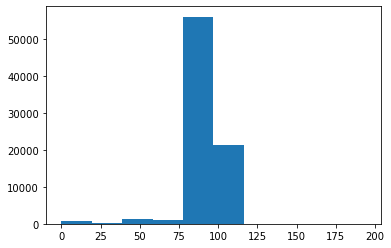

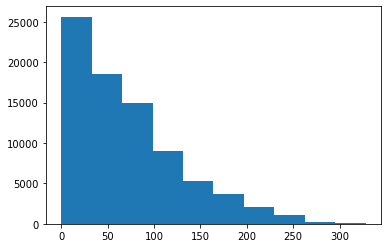

In [21]:
#There are very  few 0 values for speed, but many for volume. It is feasible to have 0 volume observations.
#Most 0 volume observations are legitimate and not caused by sensor malfunctions
#cant use 0 value of volume for detecting malfunctions
#use 0 values for speed


plt.hist(dfeb4['010Speed'])
plt.show()
plt.hist(dfeb4['010Volume'])
plt.show()

In [22]:
dfeb4['010Speed'].replace(0,np.nan,inplace=True)

print(dfeb4.info())#checking how many 0 values were converted to NaN

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80640 entries, 0 to 80639
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Time       80640 non-null  object 
 1   Date       80640 non-null  object 
 2   010Volume  80640 non-null  int64  
 3   010Speed   80183 non-null  float64
 4   032Volume  80640 non-null  int64  
 5   032Speed   80640 non-null  float64
 6   045Volume  80640 non-null  int64  
 7   045Speed   80640 non-null  float64
 8   061Volume  80640 non-null  int64  
 9   061Speed   80640 non-null  float64
dtypes: float64(4), int64(4), object(2)
memory usage: 6.2+ MB
None


In [23]:
dfeb4['010Speed'].interpolate( inplace = True,limit = 10, limit_direction='both')

In [24]:

print(dfeb4.info())#checking all NaN values have been removed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80640 entries, 0 to 80639
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Time       80640 non-null  object 
 1   Date       80640 non-null  object 
 2   010Volume  80640 non-null  int64  
 3   010Speed   80640 non-null  float64
 4   032Volume  80640 non-null  int64  
 5   032Speed   80640 non-null  float64
 6   045Volume  80640 non-null  int64  
 7   045Speed   80640 non-null  float64
 8   061Volume  80640 non-null  int64  
 9   061Speed   80640 non-null  float64
dtypes: float64(4), int64(4), object(2)
memory usage: 6.2+ MB
None


In [25]:
index_010speed = list(dfeb4.loc[pd.isna(dfeb4['010Speed']),:].index)#calculating index of NaN values
print(index_010speed)#after interpolating small groups of NaN values, this should be empty. If not, remove days of relevant index


[]


In [26]:

dfeb4['032Speed'].replace(0,np.nan,inplace=True)
print(dfeb4.info())
dfeb4['032Speed'].interpolate( inplace = True,limit = 10, limit_direction='both')
print(dfeb4.info())
index_032speed = list(dfeb4.loc[pd.isna(dfeb4['032Speed']),:].index)
index_032volume = list(dfeb4.loc[pd.isna(dfeb4['032Volume']),:].index)

print(index_032speed)
print(index_032volume)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80640 entries, 0 to 80639
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Time       80640 non-null  object 
 1   Date       80640 non-null  object 
 2   010Volume  80640 non-null  int64  
 3   010Speed   80640 non-null  float64
 4   032Volume  80640 non-null  int64  
 5   032Speed   78397 non-null  float64
 6   045Volume  80640 non-null  int64  
 7   045Speed   80640 non-null  float64
 8   061Volume  80640 non-null  int64  
 9   061Speed   80640 non-null  float64
dtypes: float64(4), int64(4), object(2)
memory usage: 6.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80640 entries, 0 to 80639
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Time       80640 non-null  object 
 1   Date       80640 non-null  object 
 2   010Volume  80640 non-null  int64  
 3   010Speed   80640 non-null  flo

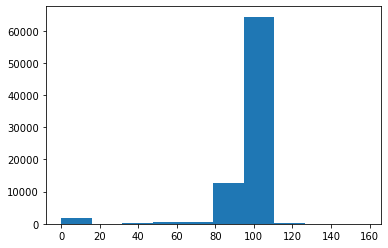

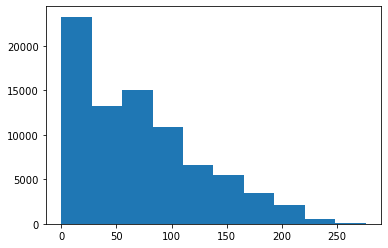

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80640 entries, 0 to 80639
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Time       80640 non-null  object 
 1   Date       80640 non-null  object 
 2   010Volume  80640 non-null  int64  
 3   010Speed   80640 non-null  float64
 4   032Volume  80640 non-null  int64  
 5   032Speed   80640 non-null  float64
 6   045Volume  80640 non-null  int64  
 7   045Speed   78701 non-null  float64
 8   061Volume  80640 non-null  int64  
 9   061Speed   80640 non-null  float64
dtypes: float64(4), int64(4), object(2)
memory usage: 6.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80640 entries, 0 to 80639
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Time       80640 non-null  object 
 1   Date       80640 non-null  object 
 2   010Volume  80640 non-null  int64  
 3   010Speed   80640 non-null  flo

In [27]:
plt.hist(dfeb4['045Speed'])
plt.show()
plt.hist(dfeb4['045Volume'])
plt.show()
dfeb4['045Speed'].replace(0,np.nan,inplace=True)
print(dfeb4.info())
dfeb4['045Speed'].interpolate( inplace = True,limit = 10, limit_direction='both')
print(dfeb4.info())
index_045speed = list(dfeb4.loc[pd.isna(dfeb4['045Speed']),:].index)

print(index_045speed)


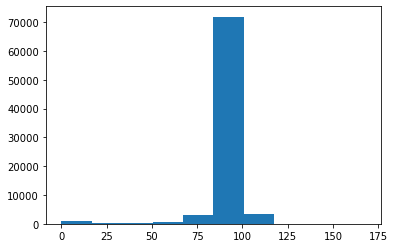

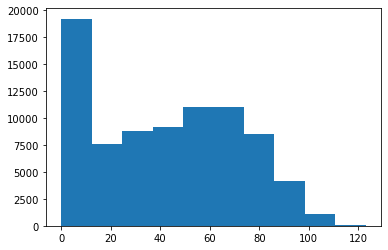

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80640 entries, 0 to 80639
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Time       80640 non-null  object 
 1   Date       80640 non-null  object 
 2   010Volume  80640 non-null  int64  
 3   010Speed   80640 non-null  float64
 4   032Volume  80640 non-null  int64  
 5   032Speed   80640 non-null  float64
 6   045Volume  80640 non-null  int64  
 7   045Speed   80640 non-null  float64
 8   061Volume  80640 non-null  int64  
 9   061Speed   79823 non-null  float64
dtypes: float64(4), int64(4), object(2)
memory usage: 6.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80640 entries, 0 to 80639
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Time       80640 non-null  object 
 1   Date       80640 non-null  object 
 2   010Volume  80640 non-null  int64  
 3   010Speed   80640 non-null  flo

In [28]:
plt.hist(dfeb4['061Speed'])
plt.show()
plt.hist(dfeb4['061Volume'])
plt.show()
dfeb4['061Speed'].replace(0,np.nan,inplace=True)
print(dfeb4.info())
dfeb4['061Speed'].interpolate( inplace = True,limit = 10, limit_direction='both')
print(dfeb4.info())
index_061speed = list(dfeb4.loc[pd.isna(dfeb4['061Speed']),:].index)

print(index_061speed)


In [29]:
print(dfeb4.head())
print(dfeb4.info())
try:
    os.makedirs('clean_data')
except OSError:
    pass
dfeb4.to_csv('clean_data/ebdataset.csv',index=False)

   Time       Date  010Volume  010Speed  032Volume  032Speed  045Volume  \
0  0:00  16-Jul-16         90      90.0         36      80.0         45   
1  0:01  16-Jul-16         50      96.0         31      77.0         45   
2  0:02  16-Jul-16         74      93.0         43      97.0         60   
3  0:03  16-Jul-16         52      95.0         55      79.0         33   
4  0:04  16-Jul-16         66      92.0         38      79.0         42   

   045Speed  061Volume  061Speed  
0      99.0         23      96.0  
1      99.0         14     100.0  
2     101.0         24      97.0  
3      96.0         19     100.0  
4      97.0         21      97.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80640 entries, 0 to 80639
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Time       80640 non-null  object 
 1   Date       80640 non-null  object 
 2   010Volume  80640 non-null  int64  
 3   010Speed   80640 non-null